In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#导入数据
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#查看缺失值，年龄和cabin的缺失值较多
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#查看数值型特征的统计
data_train.describe()
# 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())
data_train["Embarked"] = data_train["Embarked"].fillna('S')
data_train = data_train.drop(['Ticket','Cabin'],axis='columns')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


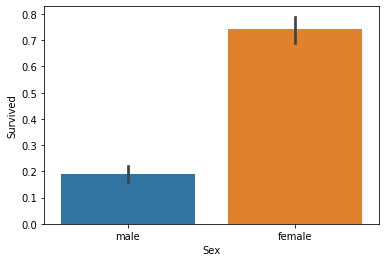

In [6]:
#看性别与生还率之间的关系，表名女性生还概率较大
sns.barplot(x='Sex',y='Survived',data = data_train)

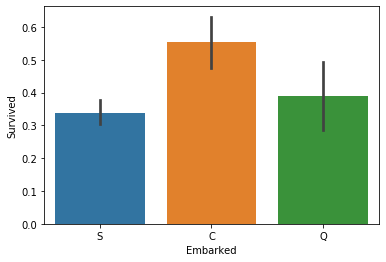

In [7]:
sns.barplot(x='Embarked',y='Survived',data=data_train)
#该图表面不同上船地点对生还率有一定影响

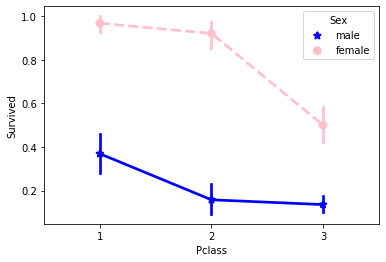

In [8]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=data_train,
             palette={'male':'blue','female':'pink'},
             markers=['*','o'],linestyles=['-','--'])
#船舱类型对生还率影响较大

D:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


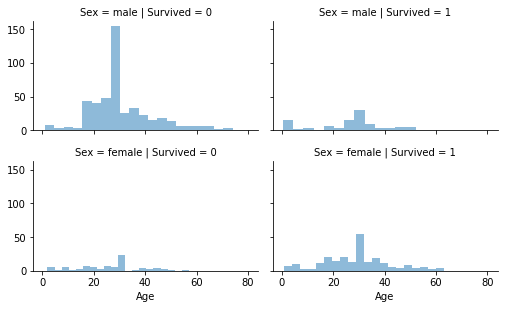

In [9]:
grid = sns.FacetGrid(data_train,col='Survived',row='Sex',
                    size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

# 将特征值非数值的转换为数值

In [10]:
data_train['Sex'].unique()  #查看特征值的
data_train.loc[data_train['Sex'] == "male",'Sex'] = 0
data_train.loc[data_train['Sex'] == "female",'Sex'] = 1  #用数值1，0来替换性别

In [11]:
data_train['Embarked'].unique()  
data_train.loc[data_train['Embarked'] == "S",'Embarked'] = 0
data_train.loc[data_train['Embarked'] == "C",'Embarked'] = 1
data_train.loc[data_train['Embarked'] == "Q",'Embarked'] = 2  #用数值0,1,2来替换Embarked的特征值

In [12]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


# 训练模型

In [13]:
from sklearn.ensemble import RandomForestClassifier  #导入随机森林模型
from sklearn.linear_model import LogisticRegression    #导入逻辑回归模型
from sklearn.model_selection import KFold          #导入交叉验证模型
from sklearn.metrics import accuracy_score      #导入评估方法

In [14]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']


#采用逻辑回归模型进行训练，并评估分数
alg = LogisticRegression()
kf = KFold(n_splits=5, random_state=1)
predictions = list()
for train, test in kf.split(data_train):
    k_train = data_train[features].iloc[train,:]
    k_label = data_train.Survived.iloc[train]
    alg.fit(k_train,k_label)
    k_predictions = alg.predict(data_train[features].iloc[test,:])
    predictions.append(k_predictions)

predictions = np.concatenate(predictions,axis=0)
accuracy_score(data_train.Survived,predictions)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7912457912457912

In [15]:
#使用随机森林模型进行预测
rf1 = RandomForestClassifier(n_estimators = 100,max_depth = 7) #指定参数：决策树个数为100个，最大深度为7层
kf = KFold(n_splits=5, random_state=1)   #采用五折交叉验证
predictions = list()
for train, test in kf.split(data_train):
    k_train = data_train[features].iloc[train,:]
    k_label = data_train.Survived.iloc[train]
    rf1.fit(k_train,k_label)
    k_predictions = alg.predict(data_train[features].iloc[test,:])
    predictions.append(k_predictions)

predictions = np.concatenate(predictions,axis=0)
accuracy_score(data_train.Survived,predictions)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8013468013468014

比较发现 使用随机森林的准确率更高

# 进行预测

In [16]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
#调整测试集的特征
df_test.loc[df_test['Sex'] == "male",'Sex'] = 0
df_test.loc[df_test['Sex'] == "female",'Sex'] = 1 
df_test.loc[df_test['Embarked'] == "S",'Embarked'] = 0
df_test.loc[df_test['Embarked'] == "C",'Embarked'] = 1
df_test.loc[df_test['Embarked'] == "Q",'Embarked'] = 2

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [19]:
# 补测试集的缺失值
df_test.Age = df_test.Age.fillna(df_test.Age.mean())
df_test.Fare = df_test.Fare.fillna(df_test.Fare.mean())

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [21]:
y_pred1 = alg.predict(df_test[features])
y_pred2 = rf1.predict(df_test[features])

In [22]:
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [23]:
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [24]:
submission_txt1 = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred1})
submission_txt2 = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred2})
submission_txt1.to_csv('titanic_submission1.csv',index = False)
submission_txt2.to_csv('titanic_submission2.csv',index = False)